In [63]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
import warnings 

warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('../data/raw/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [65]:
X = df.drop('label', axis = 1)
y = df['label']

In [66]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [67]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
label_mapping

{'apple': np.int64(0),
 'banana': np.int64(1),
 'blackgram': np.int64(2),
 'chickpea': np.int64(3),
 'coconut': np.int64(4),
 'coffee': np.int64(5),
 'cotton': np.int64(6),
 'grapes': np.int64(7),
 'jute': np.int64(8),
 'kidneybeans': np.int64(9),
 'lentil': np.int64(10),
 'maize': np.int64(11),
 'mango': np.int64(12),
 'mothbeans': np.int64(13),
 'mungbean': np.int64(14),
 'muskmelon': np.int64(15),
 'orange': np.int64(16),
 'papaya': np.int64(17),
 'pigeonpeas': np.int64(18),
 'pomegranate': np.int64(19),
 'rice': np.int64(20),
 'watermelon': np.int64(21)}

In [68]:
np.unique(y_encoded)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [69]:
print("Number of classes:", len(le.classes_))

Number of classes: 22


In [70]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y_encoded, test_size= 0.15, stratify= y_encoded, random_state= 42
)

In [71]:
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size= 0.176, stratify= y_temp, random_state= 42
)

In [72]:
total = len(X)

print("Train set size:", X_train.shape, f"({len(X_train)/total:.2%})")
print("Validation set size:", X_val.shape, f"({len(X_val)/total:.2%})")
print("Test set size:", X_test.shape, f"({len(X_test)/total:.2%})")


Train set size: (1540, 7) (70.00%)
Validation set size: (330, 7) (15.00%)
Test set size: (330, 7) (15.00%)


In [73]:
import pandas as pd

def class_distribution(y, name):
    counts = pd.Series(y).value_counts().sort_index()
    perc = counts / counts.sum() * 100
    return pd.DataFrame({
        f'{name}_count': counts,
        f'{name}_percent': perc.round(2)
    })

dist_train = class_distribution(y_train, 'Train')
dist_val   = class_distribution(y_val, 'Validation')
dist_test  = class_distribution(y_test, 'Test')

# Combine into one table
distribution_table = pd.concat([dist_train, dist_val, dist_test], axis=1)
distribution_table


,Train_count,Train_percent,Validation_count,Validation_percent,Test_count,Test_percent
0,70,4.55,15,4.55,15,4.55
1,70,4.55,15,4.55,15,4.55
2,70,4.55,15,4.55,15,4.55
3,70,4.55,15,4.55,15,4.55
4,70,4.55,15,4.55,15,4.55
5,70,4.55,15,4.55,15,4.55
6,70,4.55,15,4.55,15,4.55
7,70,4.55,15,4.55,15,4.55
8,70,4.55,15,4.55,15,4.55
9,70,4.55,15,4.55,15,4.55


In [74]:
print("Train % range:", dist_train['Train_percent'].min(), "-", dist_train['Train_percent'].max())
print("Validation % range:", dist_val['Validation_percent'].min(), "-", dist_val['Validation_percent'].max())
print("Test % range:", dist_test['Test_percent'].min(), "-", dist_test['Test_percent'].max())


Train % range: 4.55 - 4.55
Validation % range: 4.55 - 4.55
Test % range: 4.55 - 4.55


In [75]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape)
print("Validation shape:", X_val_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Train shape: (1540, 7)
Validation shape: (330, 7)
Test shape: (330, 7)


In [76]:
X_train.describe().loc[['mean', 'std']]

,N,P,K,temperature,humidity,ph,rainfall
mean,50.729870,53.323377,48.108442,25.635263,71.465542,6.466758,103.742604
std,36.954863,32.903298,50.675097,5.063532,22.301108,0.778408,55.370687


In [77]:
X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns
)

# Check mean and std
X_train_scaled_df.describe().loc[['mean', 'std']]

,N,P,K,temperature,humidity,ph,rainfall
mean,2.306957e-17,-9.227828e-18,9.689219e-17,4.936888e-16,-3.229740e-17,1.799426e-16,4.613914e-17
std,1.000325e+00,1.000325e+00,1.000325e+00,1.000325e+00,1.000325e+00,1.000325e+00,1.000325e+00


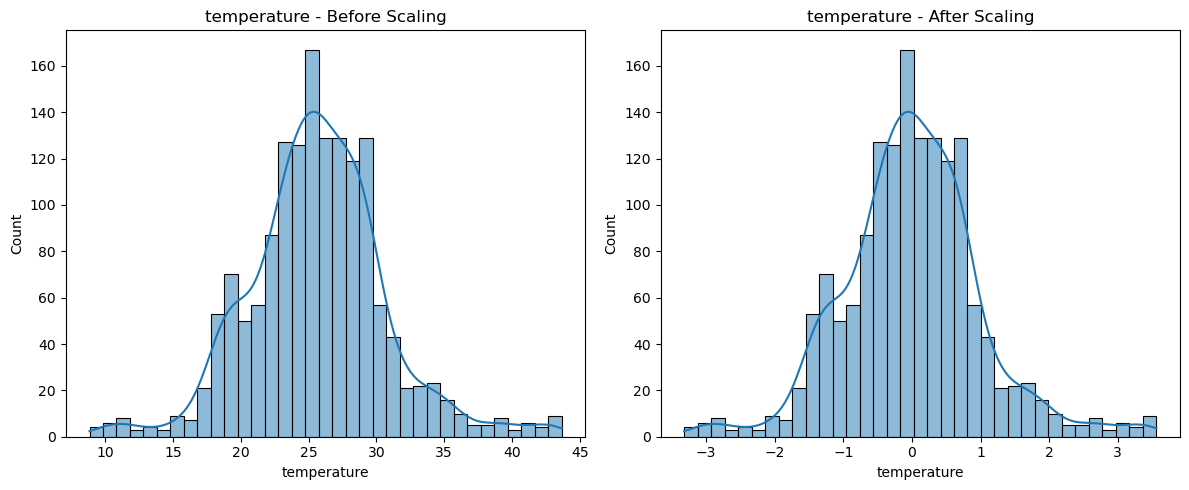

In [78]:
feature = 'temperature'

plt.figure(figsize=(12,5))

# Before scaling
plt.subplot(1,2,1)
sns.histplot(X_train[feature], kde=True)
plt.title(f'{feature} - Before Scaling')

# After scaling
plt.subplot(1,2,2)
sns.histplot(X_train_scaled_df[feature], kde=True)
plt.title(f'{feature} - After Scaling')

plt.tight_layout()
plt.show()


In [80]:
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_df   = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_df  = pd.DataFrame(X_test_scaled, columns=X_test.columns)

y_train_df = pd.DataFrame(y_train, columns=["label"])
y_val_df   = pd.DataFrame(y_val, columns=["label"])
y_test_df  = pd.DataFrame(y_test, columns=["label"])

# Save to CSV
X_train_df.to_csv("../data/processed/X_train.csv", index=False)
X_val_df.to_csv("../data/processed/X_val.csv", index=False)
X_test_df.to_csv("../data/processed/X_test.csv", index=False)

y_train_df.to_csv("../data/processed/y_train.csv", index=False)
y_val_df.to_csv("../data/processed/y_val.csv", index=False)
y_test_df.to_csv("../data/processed/y_test.csv", index=False)


In [81]:
joblib.dump(scaler, "../models/scaler.pkl")
joblib.dump(le, "../models/label_encoder.pkl")

['../models/label_encoder.pkl']